In [8]:
import numpy as np
import pandas
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams
from statsmodels.graphics.tsaplots import plot_acf

In [9]:
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,6)

In [73]:
hotel_data = pd.read_csv(r".\hotel_bookings.csv")
hotel_data.head()

C:\Users\fight\AppData\Local\Temp\ipykernel_111012\2392689571.py:1: DtypeWarning: Columns (34,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  hotel_data = pd.read_csv(r".\hotel_bookings.csv")


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,total_of_special_requests,reservation_status,reservation_status_date,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Check-Out,1/7/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Check-Out,1/7/2015,NaN,NaN,country,NaN,NaN,NaN,NaN
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Check-Out,2/7/2015,NaN,NaN,PRT,48590.0,NaN,PRT,LISBON
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Check-Out,2/7/2015,NaN,NaN,GBR,12129.0,NaN,NaN,NaN
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,1,Check-Out,3/7/2015,NaN,NaN,USA,2097.0,NaN,NaN,NaN


In [74]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [75]:
total_bookings = hotel_data.groupby('country')['is_canceled'].count()
total_cancellations = hotel_data.groupby('country')['is_canceled'].sum()

<AxesSubplot:ylabel='country'>

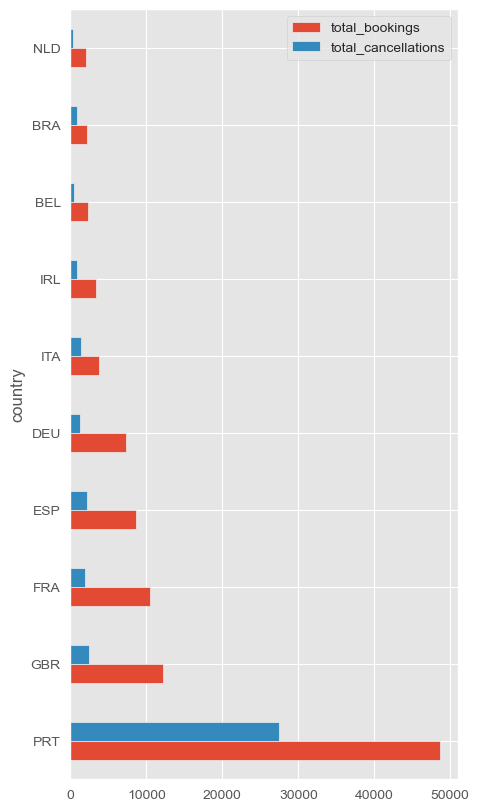

In [76]:
# Top countries in terms of total bookings
country_bookings_cancellations = pd.merge(total_bookings, total_cancellations, on='country')\
    .rename(columns = {'is_canceled_x': 'total_bookings', 'is_canceled_y': 'total_cancellations'})
country_bookings_cancellations.sort_values(by = 'total_bookings', ascending = False)\
    .head(10)\
    .plot(kind = 'barh', figsize = (5,10))

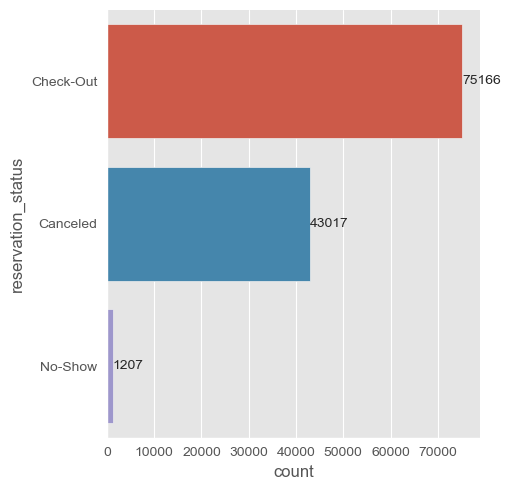

In [14]:
res_status_plot = sb.catplot(y = "reservation_status", data = hotel_data ,  kind = "count")
for i in res_status_plot.axes.flat:
    i.bar_label(i.containers[0])
plt.show(res_status_plot)

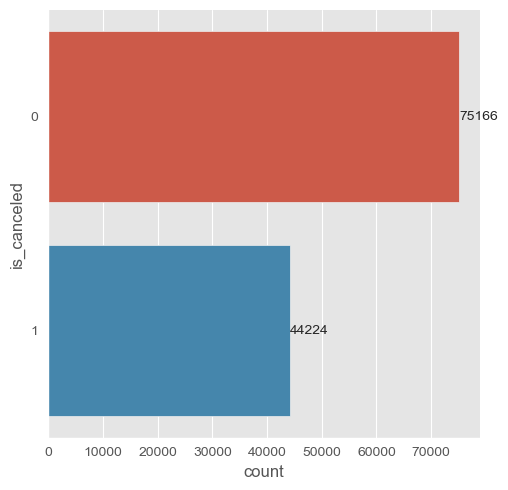

In [15]:
cancellations_plot = sb.catplot(y = "is_canceled", data = hotel_data ,  kind = "count")
for i in cancellations_plot.axes.flat:
    i.bar_label(i.containers[0])
plt.show(cancellations_plot)

# Basic Data Breakdown

## Dependent Variables (Model Types)

Binary Response Variable (Time Series & Regression)
: > is_canceled --> Whether a booking is canceled

Ternary Response Variable (Survival Analysis)
: > reservation_status --> Status update after booking period to show either booking canceled, no-show, or stay completed

### Independent Variables

Booking Characteristics
: > Lead time before booking
: > Booking time period
: > Cost of booking
: > Booking through hotel/ alternative source with discounts

Customer Characteristics
: > Booking History
: > Travelling solo/ in groups of adults/ in groups with children and babies
: > Number of special requests

Hotel Characteristics
: > Deposit policy
: > Location & Hotel Type
: > Room type

* These are not the exact variables, rather a summary of the actual values based on the data dictionary, and our relationship expectations



# Data Dictionary
|            variable             | class            | description                                                                                                                                                                                                                                                                                                                                                                                                                         |
|:-------------------------------:|:-----------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|              hotel              | character        | Hotel (H1 = Resort Hotel or H2 = City Hotel)                                                                                                                                                                                                                                                                                                                                                                                        |
|           is_canceled           | double           | Value indicating if the booking was canceled (1) or not (0)                                                                                                                                                                                                                                                                                                                                                                         |
|            lead_time            | double           | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date                                                                                                                                                                                                                                                                                                                              |
|        arrival_date_year        | double           | Year of arrival date                                                                                                                                                                                                                                                                                                                                                                                                                |
|       arrival_date_month        | character        | Month of arrival date                                                                                                                                                                                                                                                                                                                                                                                                               |
|    arrival_date_week_number     | double           | Week number of year for arrival date                                                                                                                                                                                                                                                                                                                                                                                                |
|    arrival_date_day_of_month    | double           | Day of arrival date                                                                                                                                                                                                                                                                                                                                                                                                                 |
|     stays_in_weekend_nights     | double           | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel                                                                                                                                                                                                                                                                                                                                       |
|      stays_in_week_nights       | double           | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel                                                                                                                                                                                                                                                                                                                                            |
|             adults              | double           | Number of adults                                                                                                                                                                                                                                                                                                                                                                                                                    |
|            children             | double           | Number of children                                                                                                                                                                                                                                                                                                                                                                                                                  |
|             babies              | double           | Number of babies                                                                                                                                                                                                                                                                                                                                                                                                                    |
|              meal               | character        | Type of meal booked. Categories are presented in standard hospitality meal packages: <br> Undefined/SC – no meal package;<br>BB – Bed & Breakfast; <br> HB – Half board (breakfast and one other meal – usually dinner); <br> FB – Full board (breakfast, lunch and dinner)                                                                                                                                                         |
|             country             | character        | Country of origin. Categories are represented in the ISO 3155–3:2013 format                                                                                                                                                                                                                                                                                                                                                         |
|         market_segment          | character        | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”                                                                                                                                                                                                                                                                                                                      |
|      distribution_channel       | character        | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”                                                                                                                                                                                                                                                                                                                                   |
|        is_repeated_guest        | double           | Value indicating if the booking name was from a repeated guest (1) or not (0)                                                                                                                                                                                                                                                                                                                                                       |
|     previous_cancellations      | double           | Number of previous bookings that were cancelled by the customer prior to the current booking                                                                                                                                                                                                                                                                                                                                        |
| previous_bookings_not_canceled  | double           | Number of previous bookings not cancelled by the customer prior to the current booking                                                                                                                                                                                                                                                                                                                                              |
|       reserved_room_type        | character        | Code of room type reserved. Code is presented instead of designation for anonymity reasons                                                                                                                                                                                                                                                                                                                                          |
|       assigned_room_type        | character        | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons                                                                                                                                                                    |
|         booking_changes         | double           | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation                                                                                                                                                                                                                                                                                    |
|          deposit_type           | character        | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:<br>No Deposit – no deposit was made;<br>Non Refund – a deposit was made in the value of the total stay cost;<br>Refundable – a deposit was made with a value under the total cost of stay.                                                                                                                        |
|              agent              | character        | ID of the travel agency that made the booking                                                                                                                                                                                                                                                                                                                                                                                       |
|             company             | character        | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons                                                                                                                                                                                                                                                                                  |
|      days_in_waiting_list       | double           | Number of days the booking was in the waiting list before it was confirmed to the customer                                                                                                                                                                                                                                                                                                                                          |
|          customer_type          | character        | Type of booking, assuming one of four categories:<br>Contract - when the booking has an allotment or other type of contract associated to it;<br>Group – when the booking is associated to a group;<br>Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;<br>Transient-party – when the booking is transient, but is associated to at least other transient booking |
|               adr               | double           | Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights                                                                                                                                                                                                                                                                                                                 |
|   required_car_parking_spaces   | double           | Number of car parking spaces required by the customer                                                                                                                                                                                                                                                                                                                                                                               |
|    total_of_special_requests    | double           | Number of special requests made by the customer (e.g. twin bed or high floor)                                                                                                                                                                                                                                                                                                                                                       |
|       reservation_status        | character        | Reservation last status, assuming one of three categories:<br>Canceled – booking was canceled by the customer;<br>Check-Out – customer has checked in but already departed;<br>No-Show – customer did not check-in and did inform the hotel of the reason why                                                                                                                                                                       |
|     reservation_status_date     | double           | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel                                                                                                                                                                                                                            |

# Error Definitions and Consequences
***Heteroscedasticity***
: > Inconsistent variance across the data.
: > Causes lower confidence of prediction across different levels of predictors

***Auto-correlation***
: > Tendency of time-series data to behave as a delayed function of itself due to lack of independence between variables

***Dataset Skew***
: > Measure of distribution deviation away from a normal distribution. The more skewed a dataset, the harder it becomes for the model to adapt to typically expected values of the IVs.

***Dataset Outliers***
: > Extreme values outside the lower and upper outer hinges. These can affect how the model associates the relationship of the DV with the IV.

# Preprocessing Error-Solution Table

|         Error          |           Solution           |
|:----------------------:|:----------------------------:|
|   Heteroscedasticity   |        Transformation        |
|     Missing Values     |     Imputation/ Removal      |
|    Auto-correlation    | Model parameter optimization |
|   Multicollinearity    |          PCA, Lasso          |
|      Dataset Skew      |        Transformation        |
|    Dataset Outliers    |        Transformation        |
| Categorical Variables  |        Dummy Encoding        |
|    Class Imbalance     |    Resampling, K-Folds CV    |
|         Noise          |     Remove noisy points      |

In [16]:
# Basic dataset overview
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [17]:
# we can now go through the value counts for the individual columns
results = []
for i in hotel_data.columns:
    curr = hotel_data[i]
    if curr.dtype == 'object':
        continue
    mean = curr.mean()
    median = curr.median()
    third_quartile = curr.quantile(0.75)
    variance = curr.var()
    covariance_with_target = curr.cov(hotel_data['is_canceled'])
    skew = curr.skew()
    kurtosis = curr.kurt()
    na_count = sum(curr.isna())
    results.append([i, mean, median, third_quartile, variance, covariance_with_target, skew, kurtosis, na_count])

hotel_data_stats = pd.DataFrame(results, columns = ['col.name', 'mean', 'median', 'third_quartile', 'variance', 'covariance_with_target', 'skew', 'kurtosis', 'na_count'] )

In [18]:
hotel_data_stats.head()

,col.name,mean,median,third_quartile,variance,covariance_with_target,skew,kurtosis,na_count
0,is_canceled,0.370416,0.0,1.0,0.233210,0.233210,0.536678,-1.712005,0
1,lead_time,104.011416,69.0,160.0,11419.721511,15.126964,1.346550,1.696449,0
2,arrival_date_year,2016.156554,2016.0,2017.0,0.500522,0.005692,-0.232583,-0.994564,0
3,arrival_date_week_number,27.165173,28.0,38.0,185.099790,0.053534,-0.010014,-0.986077,0
4,arrival_date_day_of_month,15.798241,16.0,23.0,77.102966,-0.025994,-0.002000,-1.187168,0


In [19]:
# check na's
hotel_data_stats.sort_values(by = 'na_count')

,col.name,mean,median,third_quartile,variance,covariance_with_target,skew,kurtosis,na_count
0,is_canceled,0.370416,0.000,1.0,0.233210,0.233210,0.536678,-1.712005,0
17,adr,101.831122,94.575,126.0,2553.866100,1.160602,10.530214,1013.189851,0
16,days_in_waiting_list,2.321149,0.000,0.0,309.574203,0.460407,11.944353,186.793070,0
13,booking_changes,0.221124,0.000,0.0,0.425503,-0.045481,6.000270,79.393605,0
12,previous_bookings_not_canceled,0.137097,0.000,0.0,2.242317,-0.041478,23.539800,767.245210,0
11,previous_cancellations,0.087118,0.000,0.0,0.712904,0.044906,24.458049,674.073693,0
10,is_repeated_guest,0.031912,0.000,0.0,0.030894,-0.007197,5.326315,26.370077,0
18,required_car_parking_spaces,0.062518,0.000,0.0,0.060168,-0.023158,4.163233,29.998056,0
9,babies,0.007949,0.000,0.0,0.009494,-0.001529,24.646545,1633.948235,0
7,adults,1.856403,2.000,2.0,0.335543,0.016789,18.317805,1352.115116,0


In [20]:
# 112593 company missing values
# let's look at possible reasons why this row has so many missing values
booking_source = hotel_data[['market_segment', 'distribution_channel', 'agent', 'company']]
booking_source.head()

,market_segment,distribution_channel,agent,company
0,Direct,Direct,NaN,NaN
1,Direct,Direct,NaN,NaN
2,Direct,Direct,NaN,NaN
3,Corporate,Corporate,304.0,NaN
4,Online TA,TA/TO,240.0,NaN


In [21]:
# let's look at the number of unique values in each
booking_source.nunique()

market_segment            8
distribution_channel      5
agent                   333
company                 352
dtype: int64

In [22]:
# at this point, we can either dummy encode our categorical variables or drop our the categories agent and channel
# to drop, we can make an assumption that agent or company that sourced the booking might not be significantly related to the cancellation rates
# if we dummy encode, the models made on the data can suffer from the effects of the high cardinality and not make accurate predictions
hotel_data2 = hotel_data.drop(columns = ['agent', 'company'])
# at the same time, we save these variables as categorical variables within our original data so that we can use alternative encoding methods in the future
hotel_data[['market_segment', 'distribution_channel', 'agent', 'company']] = hotel_data[
    ['market_segment', 'distribution_channel', 'agent', 'company']].astype('category')

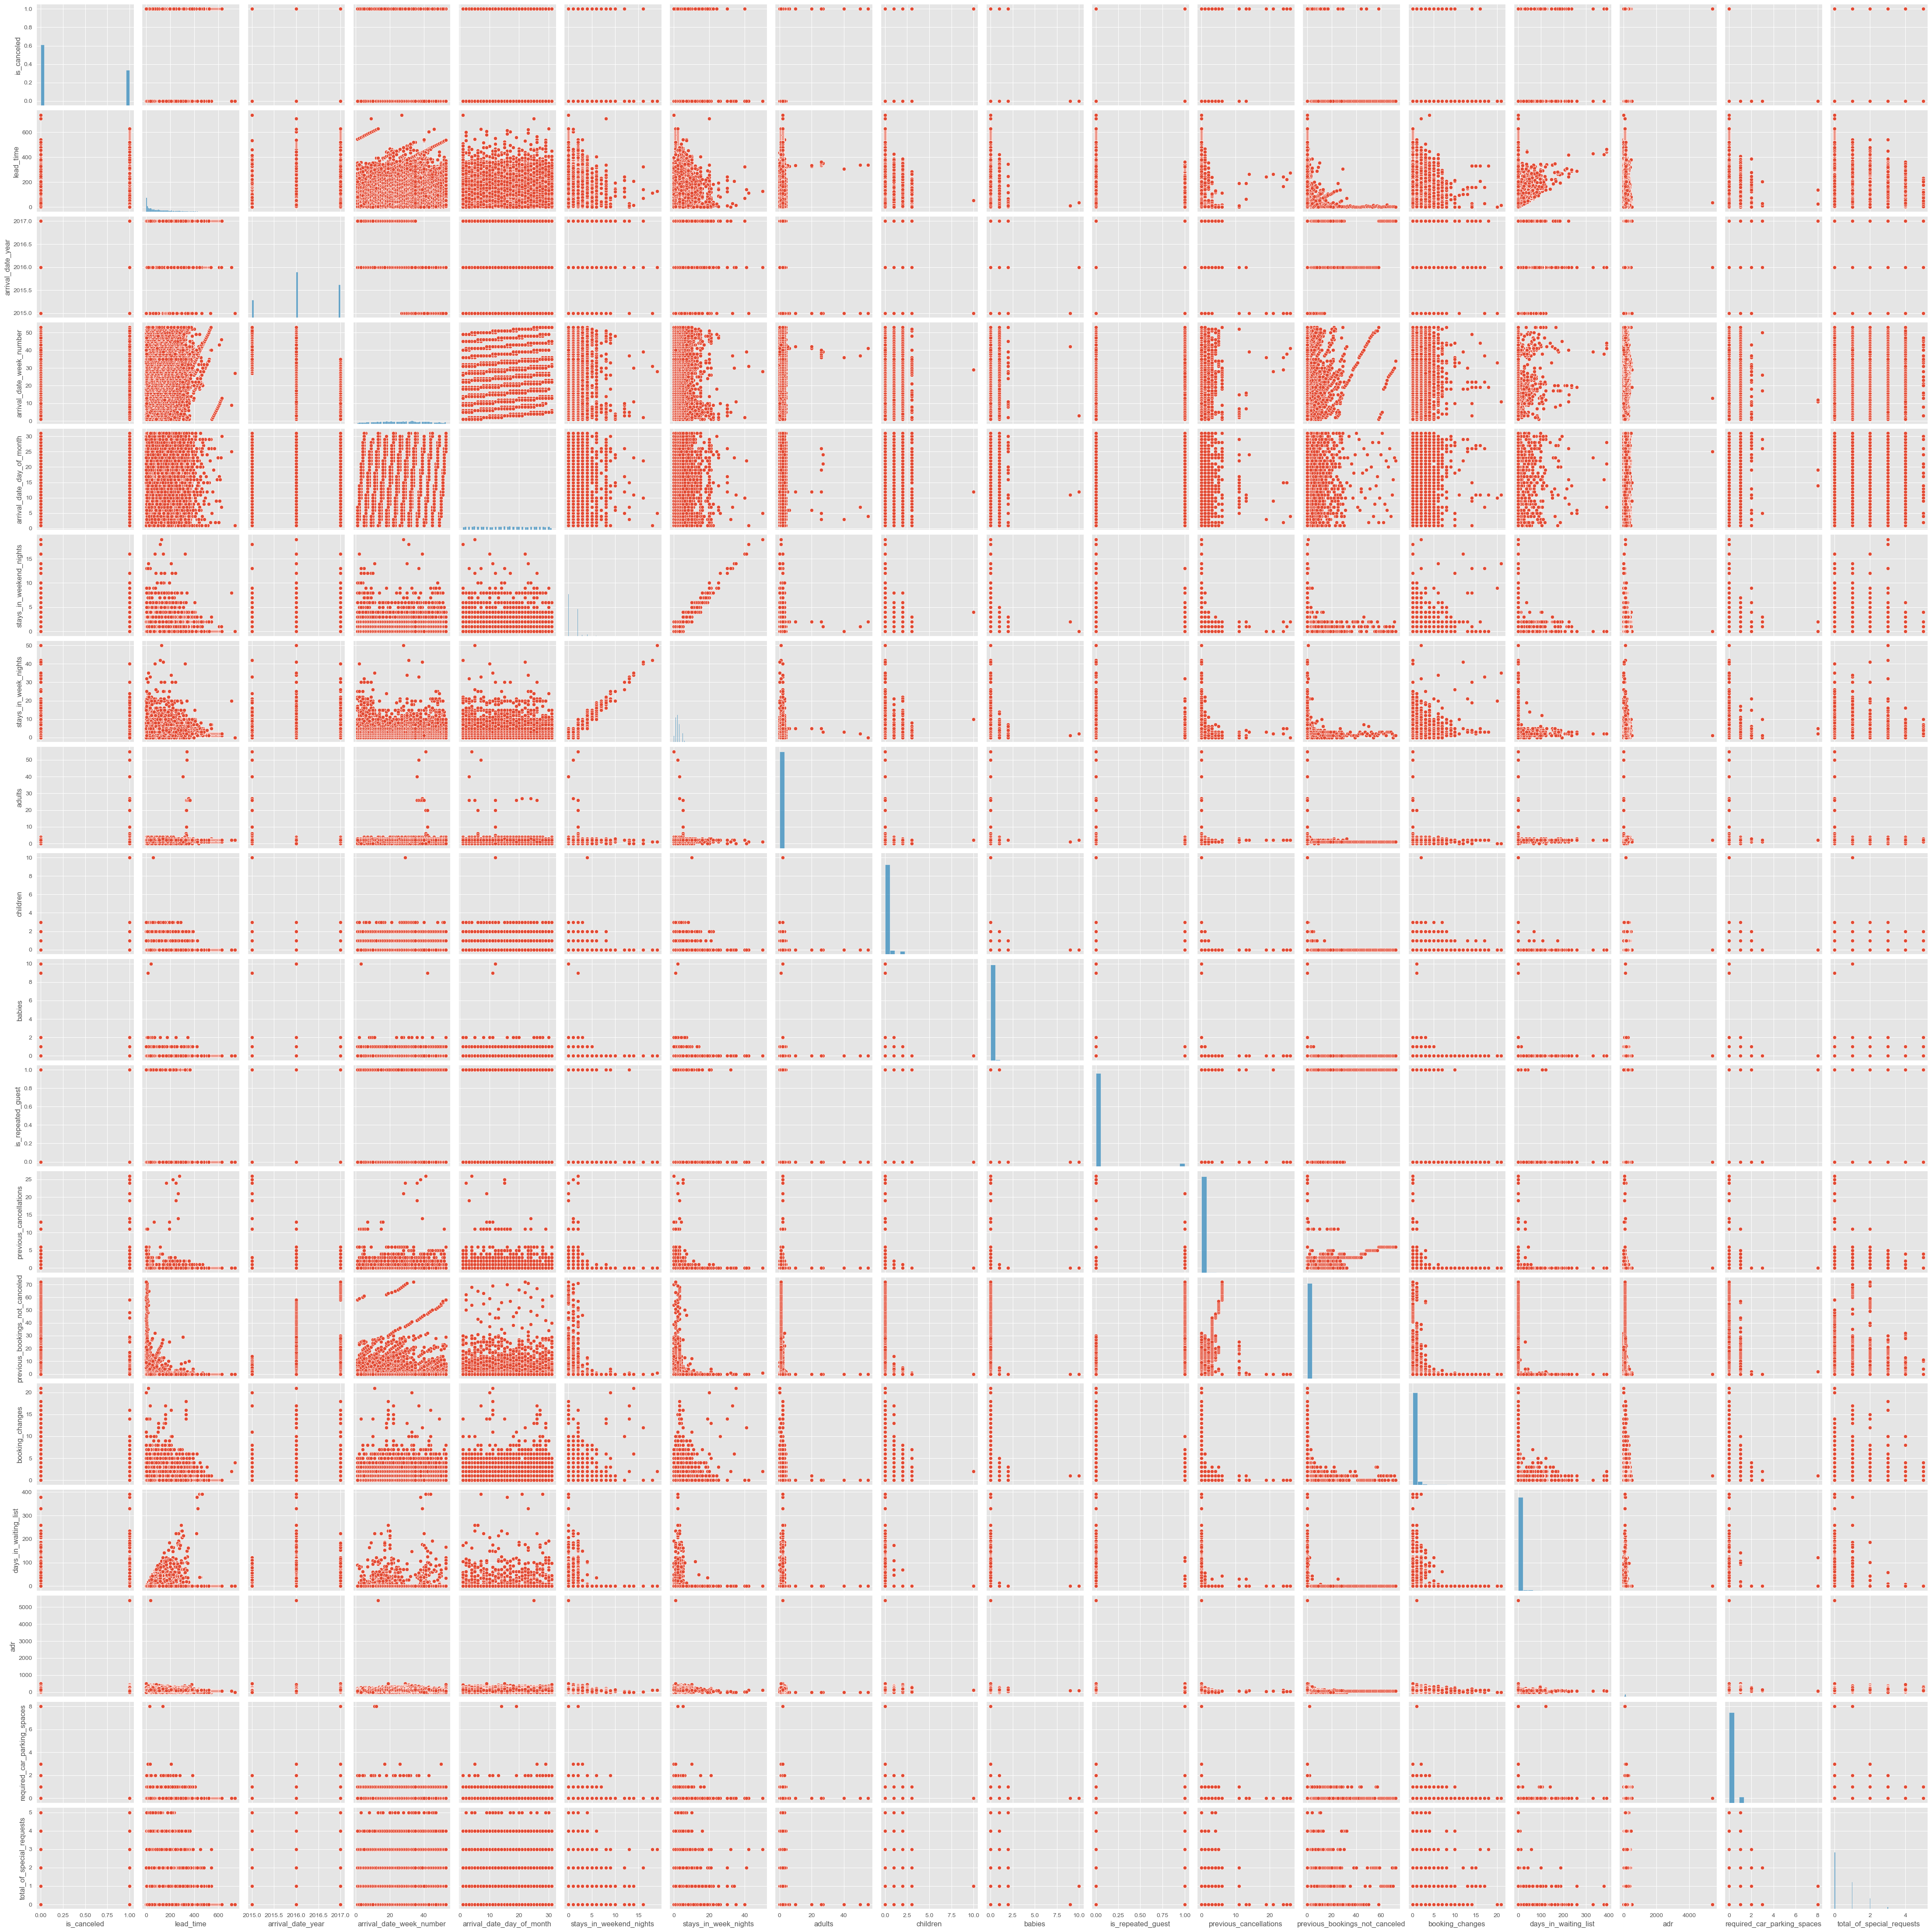

In [23]:
# now we can use a pairplot to generate scatter plots between all the variables we have
sb.pairplot(hotel_data)

In [24]:
# next, we can use boxplots to model relationships between cancellations and certain predictors
target = 'is_canceled'

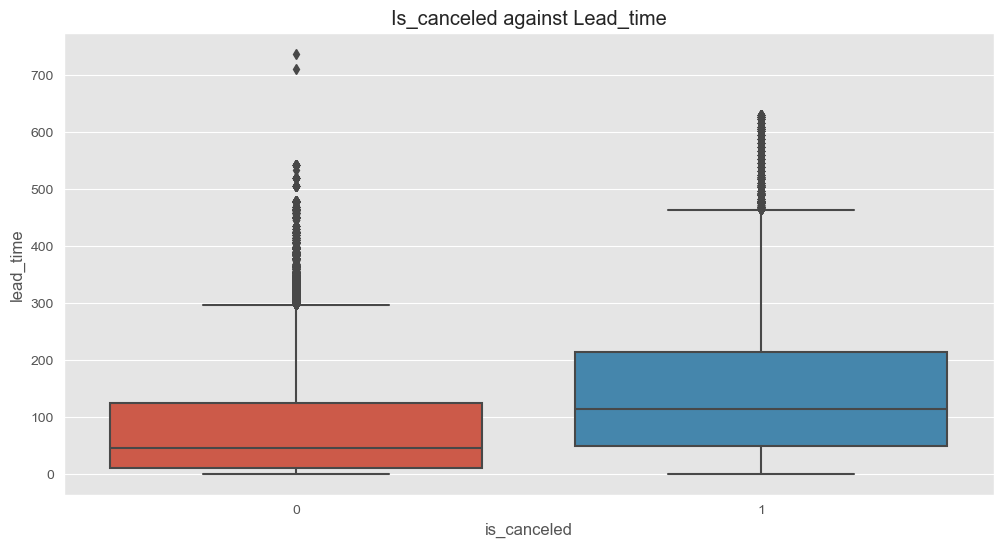

In [25]:
predictor = 'lead_time'
sb.boxplot(x = target, y = predictor, data = hotel_data)
plt.title(f"{target.capitalize()} against {predictor.capitalize()}")
plt.show()

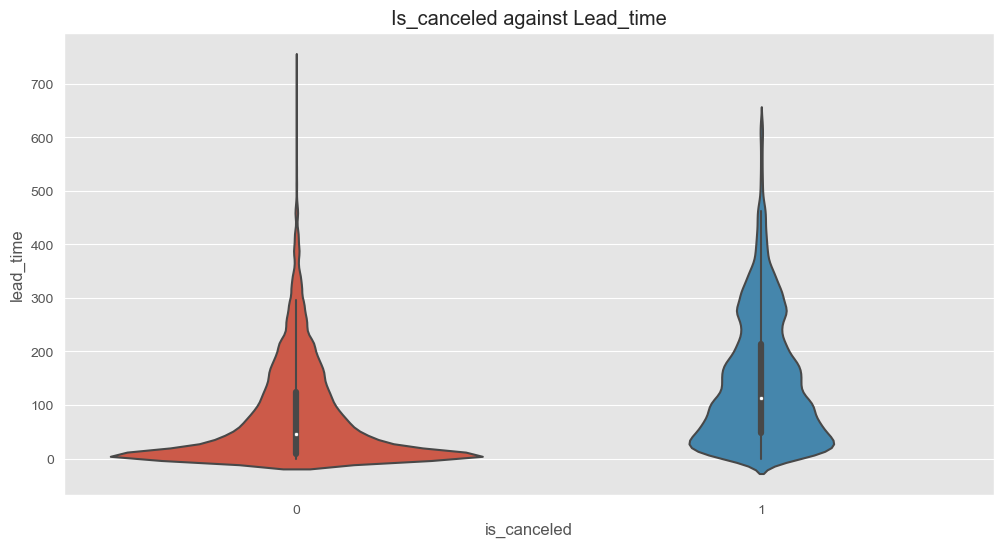

In [26]:
sb.violinplot(x = target, y = predictor, data = hotel_data, split=True)
plt.title(f"{target.capitalize()} against {predictor.capitalize()}")
plt.show()

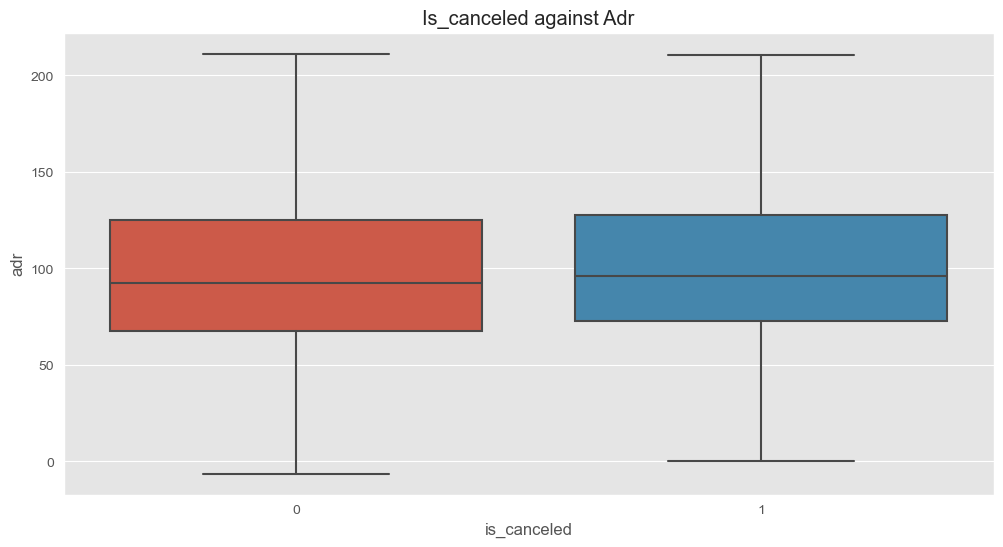

In [27]:
predictor = 'adr'
sb.boxplot(x = target, y = predictor, data = hotel_data, showfliers = False)
plt.title(f"{target.capitalize()} against {predictor.capitalize()}")
plt.show()

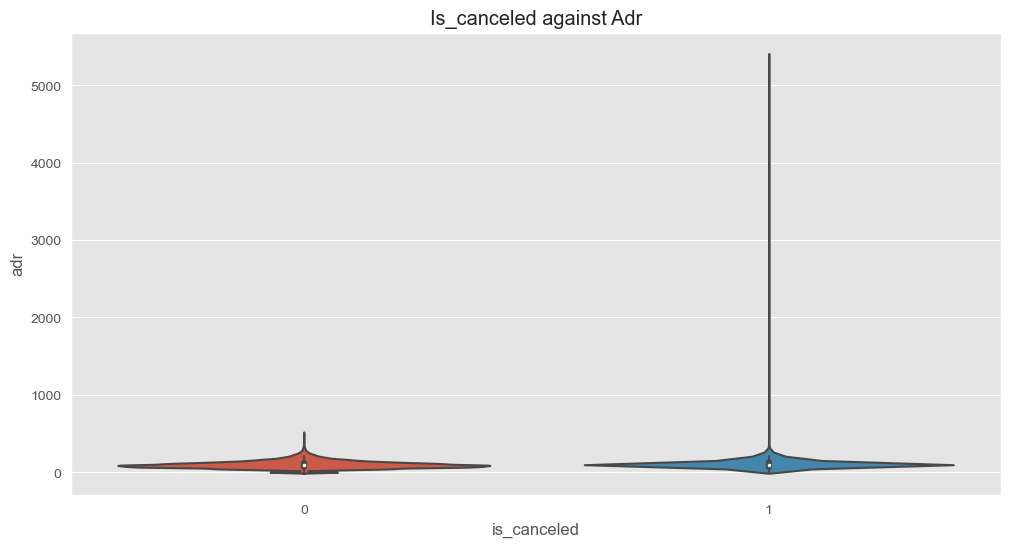

In [28]:
sb.violinplot(x = target, y = predictor, data = hotel_data, split=True,)
plt.title(f"{target.capitalize()} against {predictor.capitalize()}")
plt.show()

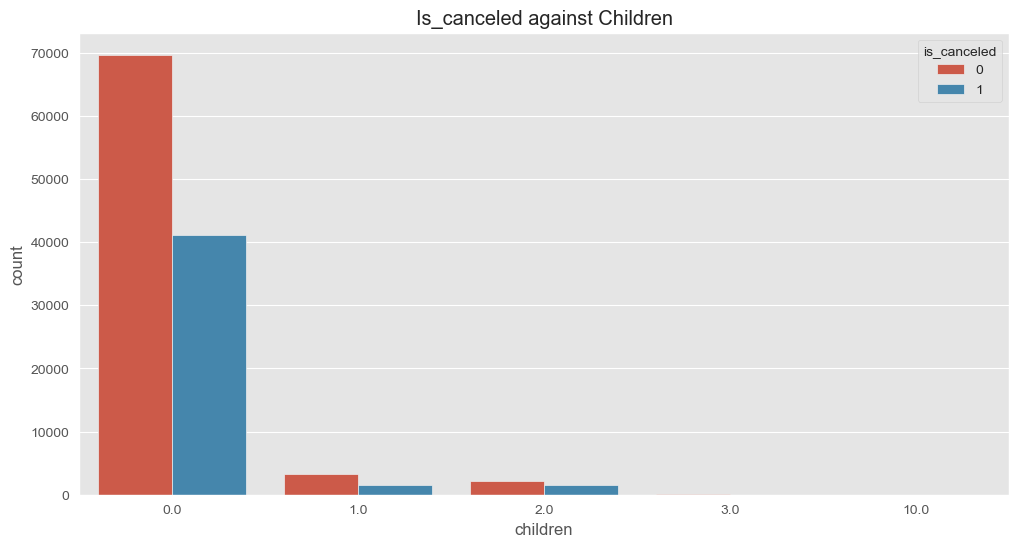

In [29]:
predictor = 'children'
sb.countplot(x = predictor, data = hotel_data, hue=target)
plt.title(f"{target.capitalize()} against {predictor.capitalize()}")
plt.show()

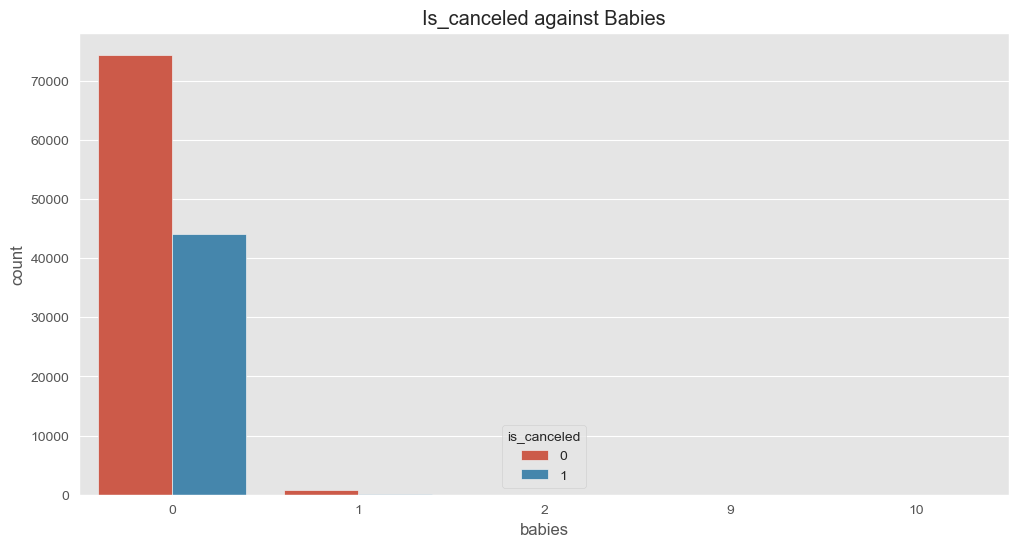

In [30]:
predictor = 'babies'
sb.countplot(x = predictor, data = hotel_data, hue = target)
plt.title(f"{target.capitalize()} against {predictor.capitalize()}")
plt.show()

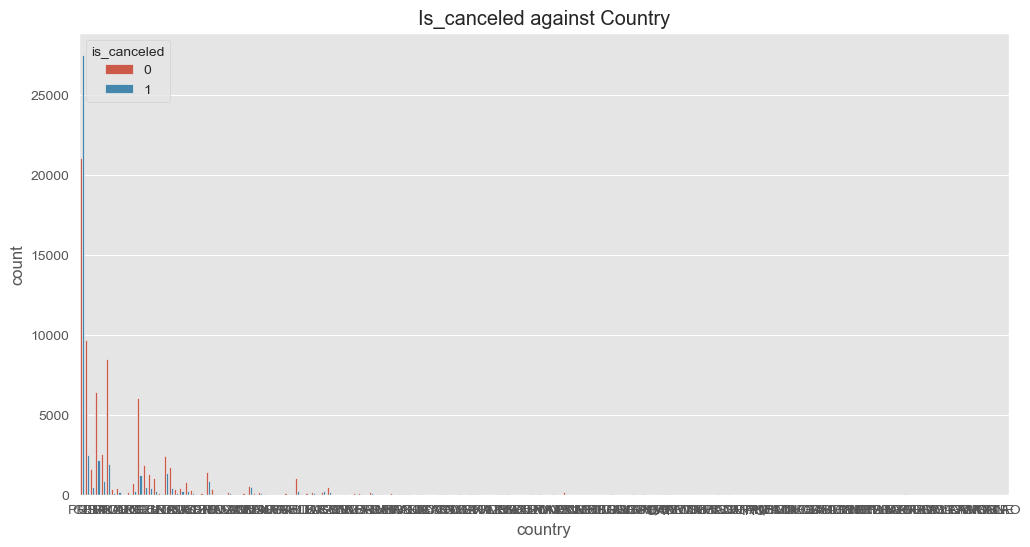

In [31]:
predictor = 'country'
sb.countplot(x = predictor, data = hotel_data, hue = target)
plt.title(f"{target.capitalize()} against {predictor.capitalize()}")
plt.show()

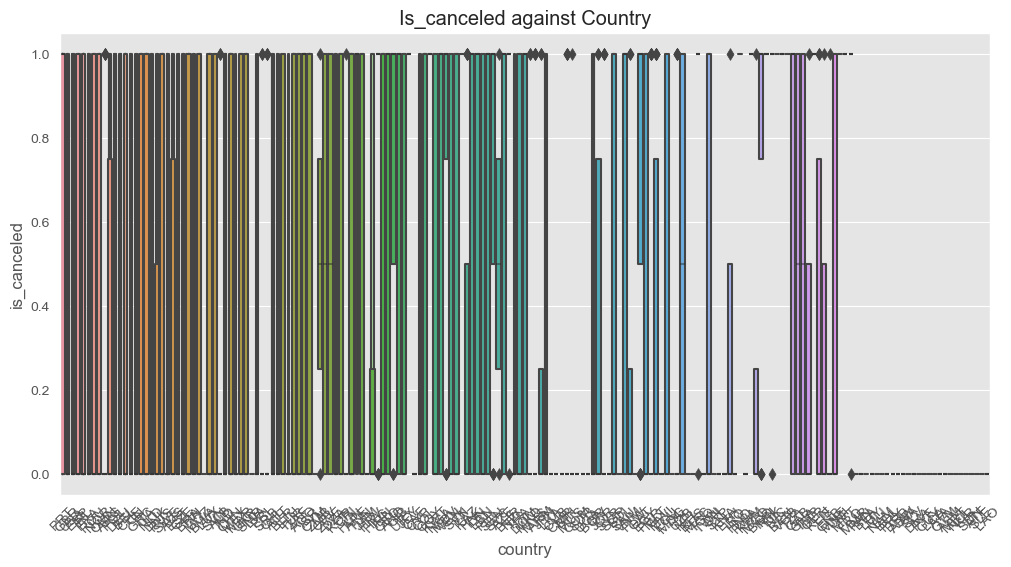

<Figure size 1000x2000 with 0 Axes>

In [32]:
sb.boxenplot(x = predictor, y = target, data = hotel_data)
plt.title(f"{target.capitalize()} against {predictor.capitalize()}")
plt.xticks(rotation = 45)
plt.figure(figsize=(10,20))
plt.show()

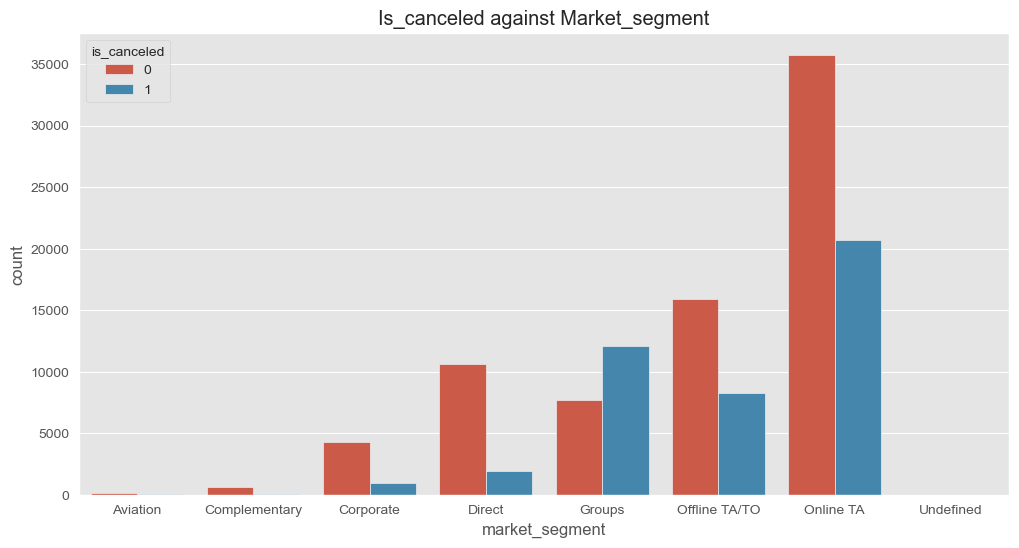

In [33]:
predictor = 'market_segment'
sb.countplot(x = predictor, hue = target, data = hotel_data)
plt.title(f"{target.capitalize()} against {predictor.capitalize()}")
plt.show()

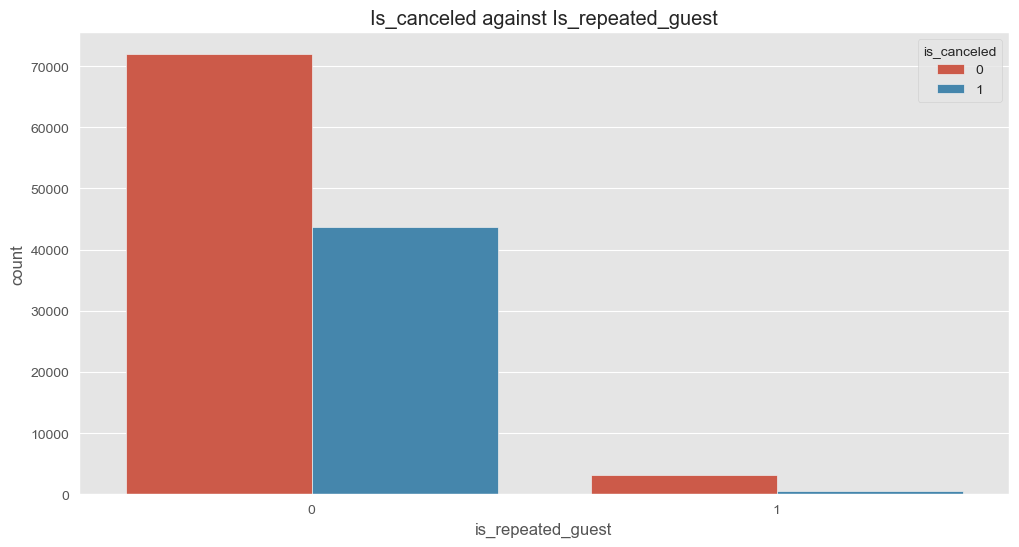

In [34]:
predictor = 'is_repeated_guest'
sb.countplot(x = predictor, hue = target, data = hotel_data)
plt.title(f"{target.capitalize()} against {predictor.capitalize()}")
plt.show()

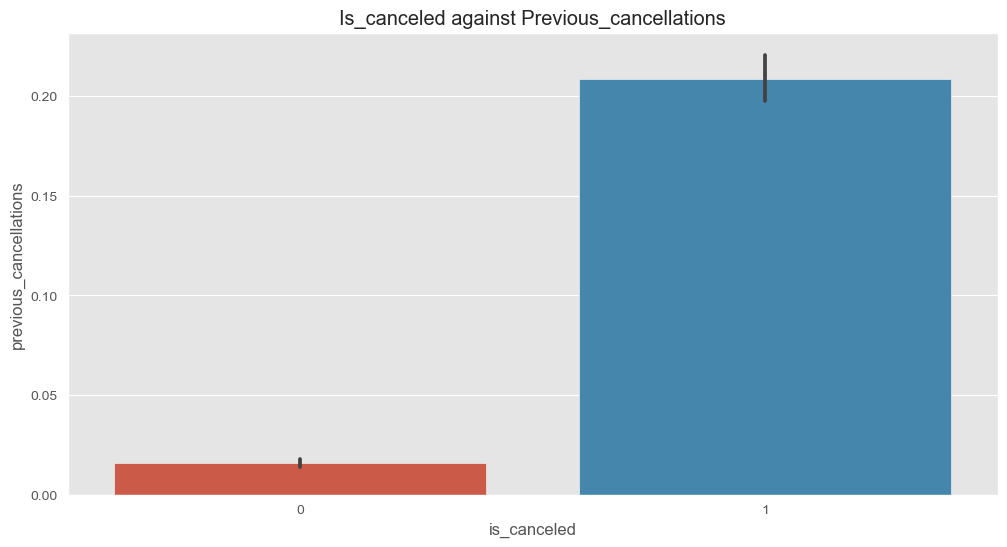

In [35]:
predictor = 'previous_cancellations'
sb.barplot(x = target, y = predictor, data = hotel_data)
plt.title(f"{target.capitalize()} against {predictor.capitalize()}")
plt.show()

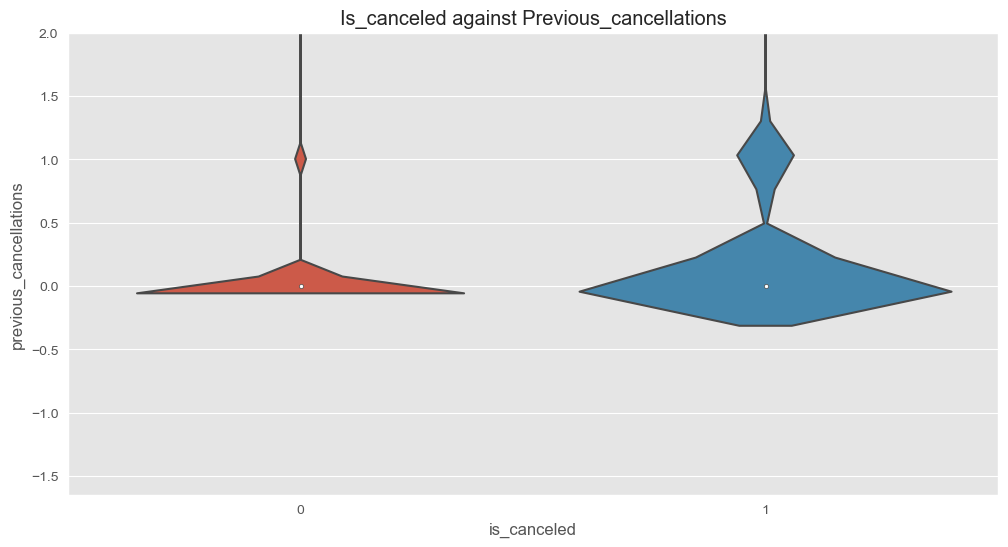

In [36]:
ax = sb.violinplot(x = target, y = predictor, data = hotel_data, split=True,)
plt.title(f"{target.capitalize()} against {predictor.capitalize()}")
ax.set_ylim(ymax = 2)
plt.show()

# Pre-processing

### Preprocessing Error-Solution Table

|         Error          |           Solution           |
|:----------------------:|:----------------------------:|
|   Heteroscedasticity   |        Transformation        |
|     Missing Values     |     Imputation/ Removal      |
|    Auto-correlation    | Model parameter optimization |
|   Multicollinearity    |          PCA, Lasso          |
|      Dataset Skew      |        Transformation        |
|    Dataset Outliers    |        Transformation        |
| Categorical Variables  |        Dummy Encoding        |
|    Class Imbalance     |    Resampling, K-Folds CV    |
|         Noise          |     Remove noisy points      |

In [44]:
# Assigning data correct types
hotel_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [78]:
# set the arrival date month to month number
from datetime import datetime
month_num = lambda x: datetime.strptime(x, '%B').month
hotel_data['arrival_date_month'] = hotel_data['arrival_date_month'].map(month_num)
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [79]:
# add in column arrival day for continuous time series by day of year
day_of_year = lambda year, month, day: datetime.strptime(f"{year}-{month}-{day}", "%Y-%m-%d").timetuple().tm_yday
day_list = []
for i in range(len(hotel_data)):
    yr = hotel_data.arrival_date_year[i]
    mth = hotel_data.arrival_date_month[i]
    dy = hotel_data.arrival_date_day_of_month[i]
    x = day_of_year(yr, mth, dy)
    day_list.append(x)

day_lst = pd.DataFrame(day_list, columns=['year_day'])
day_lst.head()

,year_day
0,182
1,182
2,182
3,182
4,182


In [86]:
hotel_data['idx'] = hotel_data.index
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,idx
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015,0
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015,1
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015,2
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015,3
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015,4


In [87]:
day_lst['idx'] = day_lst.index
day_lst.head()

,year_day,idx
0,182,0
1,182,1
2,182,2
3,182,3
4,182,4


In [91]:
day_lst.shape

(119390, 2)

In [93]:
hotel_data = pd.concat([hotel_data, day_lst], axis = 1)
hotel_data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,idx,year_day,idx
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,1/7/2015,0,182,0
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,1/7/2015,1,182,1
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2/7/2015,2,182,2
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2/7/2015,3,182,3
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,3/7/2015,4,182,4


In [94]:
# basic time series data is available in a continuous daily, weekly, and monthly format
# we now check the column types for each column and assign them into one of 4 groups, namely
# Nominal
# Ordinal
# Interval
# Ratio
# Note that categorical conversion will be done for nominal and ordinal whereas interval and ratio items will remain the same

In [98]:
print(hotel_data.dtypes)

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,idx,year_day,idx,day_of_year
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,1/7/2015,0,182,0,182
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,1/7/2015,1,182,1,182
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2/7/2015,2,182,2,182
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2/7/2015,3,182,3,182
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,3/7/2015,4,182,4,182


In [125]:
hotel_data = hotel_data.drop(columns=['idx', 'year_day'])
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,day_of_year
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015,182
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015,182
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015,182
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015,182
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015,182


In [144]:
# categorical variables according to object types
cat_list = []
for i in enumerate(hotel_data.columns):
    if hotel_data[f'{i[1]}'].dtype == object:
        cat_list.append(i[1])

print(cat_list)

['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


In [145]:
# now add in data items according to the data dict
item_list = ['is_canceled', 'is_repeated_guest', 'agent', 'company']
for a in item_list:
    cat_list.append(a)

cat_list

['hotel',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date',
 'is_canceled',
 'is_repeated_guest',
 'agent',
 'company']

In [146]:
hotel_data_cat = hotel_data[cat_list]
hotel_data_cat.head()

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,is_canceled,is_repeated_guest,agent,company
0,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,1/7/2015,0,0,NaN,NaN
1,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,1/7/2015,0,0,NaN,NaN
2,Resort Hotel,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2/7/2015,0,0,NaN,NaN
3,Resort Hotel,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2/7/2015,0,0,304.0,NaN
4,Resort Hotel,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,3/7/2015,0,0,240.0,NaN


In [147]:
# we are dropping agent and company based on the earlier assumption that cases where certain agents or certain companies would have high effects on cancellation was irrelevant
hotel_data_cat = hotel_data_cat.drop(columns = ['agent', 'company'])

In [128]:
# encoding columns to appropriate types
from sklearn import cluster, discriminant_analysis, ensemble, feature_extraction, feature_selection, metrics, preprocessing
preprocessing.

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,1/7/2015
1,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,1/7/2015
2,Resort Hotel,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2/7/2015
3,Resort Hotel,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2/7/2015
4,Resort Hotel,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,3/7/2015


In [121]:
for i in enumerate(hotel_data.columns):
    print(i[1])
    print(hotel_data[f'{i[1]}'].dtype)

hotel
object
is_canceled
int64
lead_time
int64
arrival_date_year
int64
arrival_date_month
int64
arrival_date_week_number
int64
arrival_date_day_of_month
int64
stays_in_weekend_nights
int64
stays_in_week_nights
int64
adults
int64
children
float64
babies
int64
meal
object
country
object
market_segment
object
distribution_channel
object
is_repeated_guest
int64
previous_cancellations
int64
previous_bookings_not_canceled
int64
reserved_room_type
object
assigned_room_type
object
booking_changes
int64
deposit_type
object
agent
float64
company
float64
days_in_waiting_list
int64
customer_type
object
adr
float64
required_car_parking_spaces
int64
total_of_special_requests
int64
reservation_status
object
reservation_status_date
object
idx


AttributeError: 'DataFrame' object has no attribute 'dtype'

In [153]:
# seeing categorical encoding has led to very high dimensionality, we can try using Principal Component Analysis to reduce our data dimensionality
hotel_data_non_cat = hotel_data.drop(columns = cat_list)
hotel_data_non_cat

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,day_of_year
0,342,2015,7,27,1,0,0,2,0.0,0,0,0,3,0,0.00,0,0,182
1,737,2015,7,27,1,0,0,2,0.0,0,0,0,4,0,0.00,0,0,182
2,7,2015,7,27,1,0,1,1,0.0,0,0,0,0,0,75.00,0,0,182
3,13,2015,7,27,1,0,1,1,0.0,0,0,0,0,0,75.00,0,0,182
4,14,2015,7,27,1,0,2,2,0.0,0,0,0,0,0,98.00,0,1,182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2017,8,35,30,2,5,2,0.0,0,0,0,0,0,96.14,0,0,242
119386,102,2017,8,35,31,2,5,3,0.0,0,0,0,0,0,225.43,0,2,243
119387,34,2017,8,35,31,2,5,2,0.0,0,0,0,0,0,157.71,0,4,243
119388,109,2017,8,35,31,2,5,2,0.0,0,0,0,0,0,104.40,0,0,243


In [157]:
hotel_data_non_cat = hotel_data_non_cat.dropna()

array([[ 2.17448761e+02, -1.07621743e+02, -8.97730158e+01, ...,
         5.71216809e-02,  2.65269290e+00,  1.46299300e+00],
       [ 5.77310166e+02, -2.68951411e+02, -7.05372045e+01, ...,
        -4.68895646e-02,  3.63154196e+00,  2.07252979e+00],
       [-8.89516604e+01,  3.53672206e+01, -3.13587046e+01, ...,
         5.83290087e-01, -3.99651691e-02,  6.45287468e-01],
       ...,
       [-4.03166763e+01,  8.72278519e+01,  4.83138254e+01, ...,
        -2.86826923e+00, -4.97908237e-01, -6.86585147e-01],
       [ 2.88691172e+01,  5.22099062e+01, -1.16096161e+00, ...,
         5.48329129e-01, -1.89630074e-01, -1.29479285e+00],
       [ 1.14764563e+02,  1.50368557e+01,  5.02828339e+01, ...,
        -1.15219953e+00, -4.02501100e-01, -6.62415907e-01]])